In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    './Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


2024-12-27 14:51:01.250146: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-12-27 14:51:01.250180: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-27 14:51:01.250187: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-27 14:51:01.250250: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-27 14:51:01.250433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    './Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


### To Avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be a chance of underfitting, so increase number of neuron
3. Add more Convolutional layer to extract more feature from images there may be possibility that model unable to capyure relevant feature or model is confusiong due to lack of feature so feed with more feature

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [5]:
model = Sequential()

In [6]:
#Building Convolutional
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [7]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=1500,activation='relu'))

In [14]:
model.add(Dropout(0.4))

In [15]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [16]:
#Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

### Model Training

In [18]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2024-12-27 14:51:02.915163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-12-27 14:51:02.993212: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


2197/2197 [==============================] - 127s 57ms/step - loss: 1.4035 - accuracy: 0.5888 - val_loss: 0.6127 - val_accuracy: 0.8041
Epoch 2/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.5075 - accuracy: 0.8422 - val_loss: 0.3197 - val_accuracy: 0.8980
Epoch 3/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.3374 - accuracy: 0.8968 - val_loss: 0.2481 - val_accuracy: 0.9204
Epoch 4/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.2512 - accuracy: 0.9224 - val_loss: 0.2519 - val_accuracy: 0.9239
Epoch 5/10
2197/2197 [==============================] - 124s 56ms/step - loss: 0.1977 - accuracy: 0.9388 - val_loss: 0.1787 - val_accuracy: 0.9479
Epoch 6/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.1687 - accuracy: 0.9482 - val_loss: 0.2040 - val_accuracy: 0.9421
Epoch 7/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.1506 - accuracy: 0.9558 - val_loss: 0.2207 - val

### Model Evaluation

In [19]:
#Model Evaluation on Training Set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 33s 15ms/step - loss: 0.0425 - accuracy: 0.9879


In [20]:
print(train_loss, train_acc)

0.04247713088989258 0.987908124923706


In [21]:
#Model Evaluation on Validation Set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 9s 15ms/step - loss: 0.1778 - accuracy: 0.9606


In [22]:
print(val_loss, val_acc)

0.17777985334396362 0.9606191515922546


### Saving Model

In [23]:
model.save("Trained_model.h5")

/Users/rishaan/tensorflow-keras/env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
training_history.history

{'loss': [1.4035240411758423,
  0.5074723362922668,
  0.3373851180076599,
  0.2511843740940094,
  0.19766876101493835,
  0.16868214309215546,
  0.15059328079223633,
  0.12771867215633392,
  0.11924067884683609,
  0.10997169464826584],
 'accuracy': [0.5888469815254211,
  0.8421509265899658,
  0.896777868270874,
  0.9223984479904175,
  0.9387723207473755,
  0.948203980922699,
  0.9557721018791199,
  0.9634397625923157,
  0.9661427140235901,
  0.9700547456741333],
 'val_loss': [0.6127420663833618,
  0.3196558654308319,
  0.24811136722564697,
  0.25186023116111755,
  0.17873264849185944,
  0.20401856303215027,
  0.22069506347179413,
  0.19820016622543335,
  0.24253347516059875,
  0.17777995765209198],
 'val_accuracy': [0.8040632605552673,
  0.8979626893997192,
  0.9203847050666809,
  0.9238561391830444,
  0.9478716254234314,
  0.9421238303184509,
  0.9422376751899719,
  0.949066698551178,
  0.9422945380210876,
  0.9606191515922546]}

In [25]:
#Recording history in json
import json        #Use pickle also to record the history
with open('training_history.json','w') as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

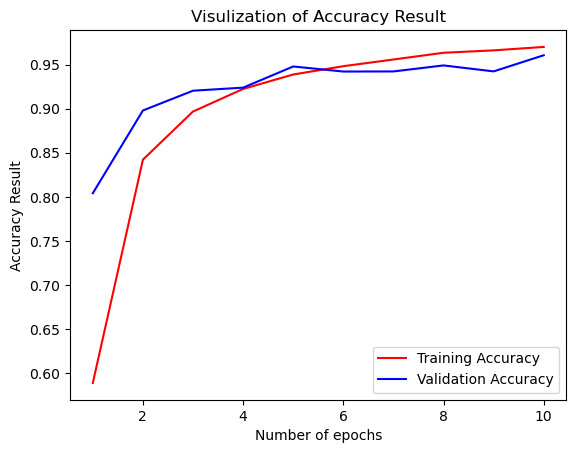

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy Result')
plt.title('Visulization of Accuracy Result')
plt.legend()

### Some other metrics for model evaluation

In [27]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    './Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 8s 14ms/step


(array([[1.0000000e+00, 2.6230840e-13, 1.3712637e-19, ..., 1.5124061e-34,
         1.1787245e-29, 3.3835068e-25],
        [1.0000000e+00, 1.2449589e-08, 7.5321552e-13, ..., 2.0807433e-26,
         3.0085787e-21, 2.1480050e-19],
        [1.0000000e+00, 8.9264707e-13, 1.0817528e-15, ..., 9.3668741e-36,
         9.1167896e-29, 6.7114809e-23],
        ...,
        [7.2031124e-11, 8.7403080e-14, 3.8997316e-11, ..., 3.7967669e-14,
         1.6893745e-14, 9.9999726e-01],
        [1.7888644e-11, 6.8093680e-17, 2.1118766e-12, ..., 6.4032404e-14,
         2.1730937e-14, 9.9999976e-01],
        [5.3207513e-16, 9.0388423e-20, 1.5198097e-17, ..., 1.9300764e-19,
         8.2885917e-13, 9.9999952e-01]], dtype=float32),
 (17572, 38))

In [30]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [31]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [32]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [33]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.97      0.94       504
                                 Apple___Black_rot       0.97      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.93      0.97      0.95       502
                               Blueberry___healthy       1.00      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.78      0.86       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.83      0.99      0.

In [36]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[487,   4,   0, ...,   0,   0,   0],
       [  3, 489,   0, ...,   0,   0,   0],
       [  1,   0, 419, ...,   0,   4,   1],
       ...,
       [  0,   0,   0, ..., 480,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  2,   0,   1, ...,   0,   0, 465]])

Text(0.5, 1.0, 'Plant Disease Prediction Confusion Matrix')

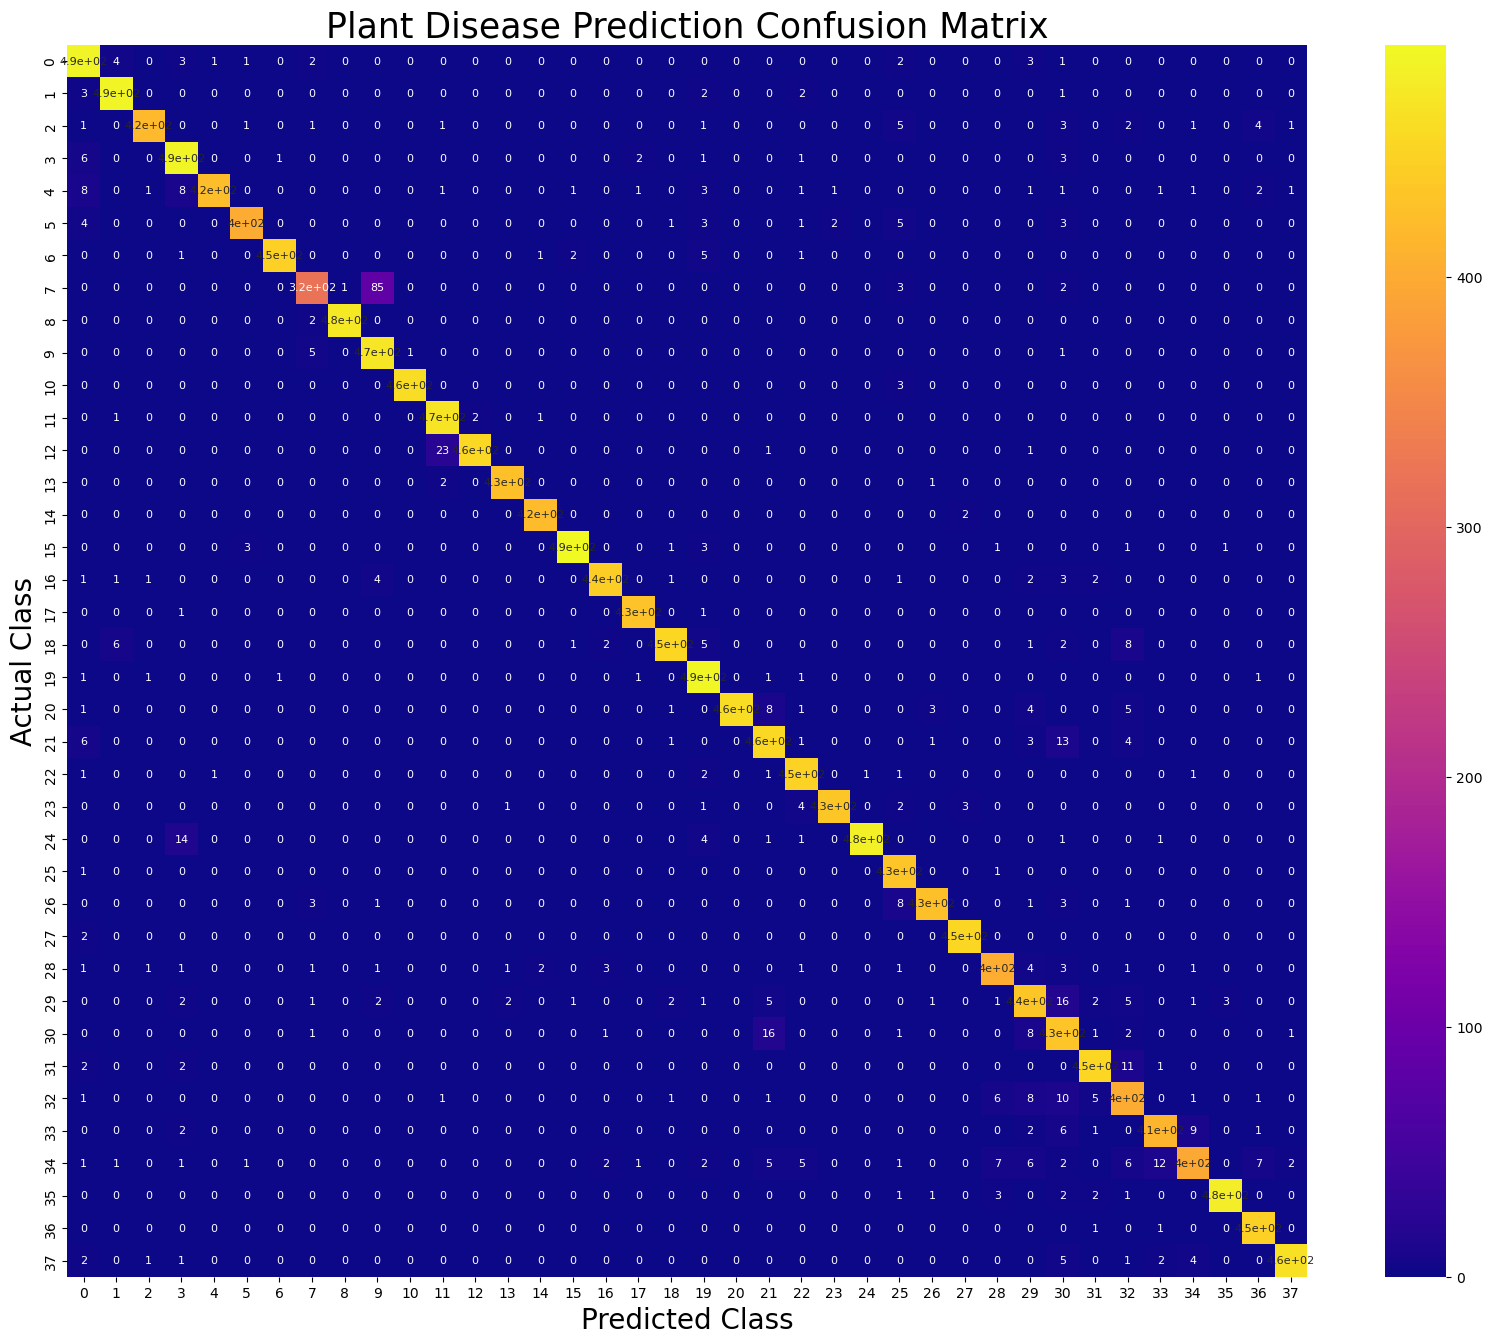

In [42]:
plt.figure(figsize=(20,16))
sns.heatmap(cm,annot=True,cmap='plasma',annot_kws={'size':8})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize=25)